In [1]:
print('Hello')

Hello


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_csv(r'd:\Practice\Pandas\Economics_dataset.csv')
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1340
1,1,2017,11,2.50,5.3,1440
2,2,2017,10,2.50,5.4,1423
3,3,2017,9,2.50,5.4,1411
4,4,2017,8,2.50,5.4,1404
5,5,2017,7,2.50,5.4,1358
6,6,2017,6,2.50,5.4,1292
7,7,2017,5,2.25,5.4,1213
8,8,2017,4,2.25,5.6,1199
9,9,2017,3,2.25,5.7,1181


In [8]:
#Drop uncessary columns
df.drop(columns =['Unnamed: 0'], axis = 1 , inplace = True)

In [11]:
df.drop(columns =['year','month'], axis = 1 , inplace = True)

In [12]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

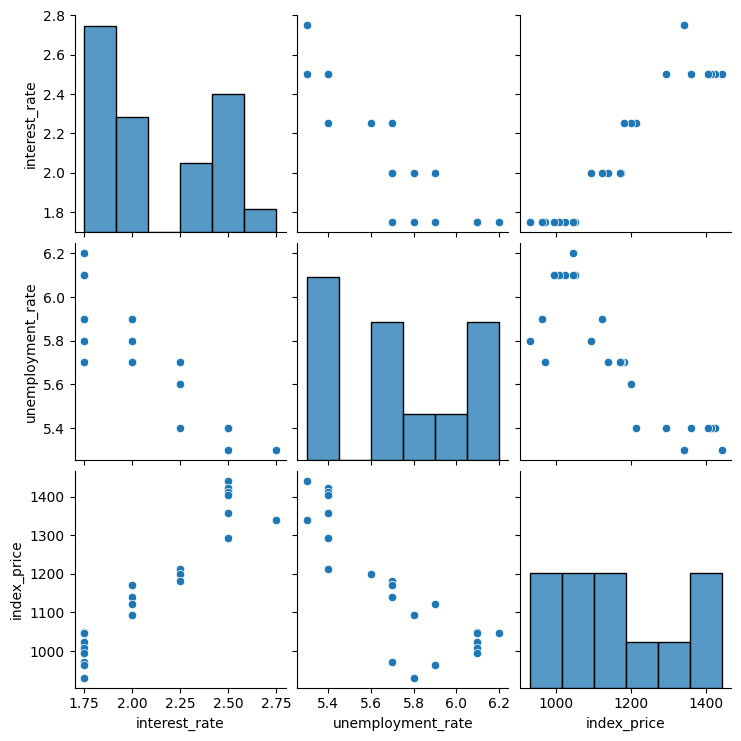

In [13]:
#Lets do visualization
import seaborn as sns
sns.pairplot(df)

In [14]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.912119,0.945371
unemployment_rate,-0.912119,1.000000,-0.850201
index_price,0.945371,-0.850201,1.000000


Text(0, 0.5, 'Unemployment rate')

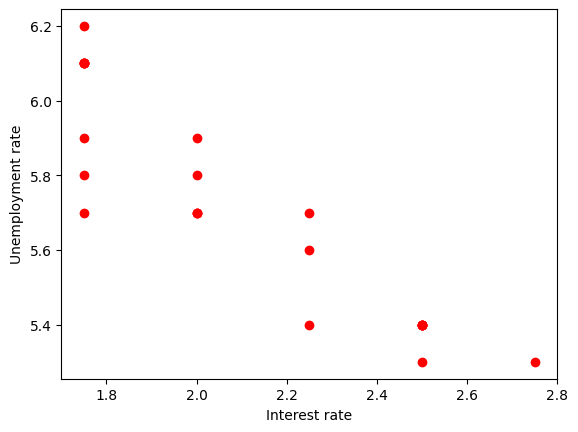

In [18]:
plt.scatter(df['interest_rate'],df['unemployment_rate'], color = 'r')
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')

In [21]:
#Independent features
# X = df[['interest_rate','unemployment_rate']]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.4
3,2.50,5.4
4,2.50,5.4


In [23]:
y

0     1340
1     1440
2     1423
3     1411
4     1404
5     1358
6     1292
7     1213
8     1199
9     1181
10    1172
11    1170
12    1139
13    1122
14    1093
15    1050
16    1047
17    1046
18    1024
19    1008
20     995
21     972
22     963
23     931
Name: index_price, dtype: int64

In [27]:
#Train Test split
!pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

DEPRECATION: Loading egg at c:\users\thoma\appdata\local\programs\python\python312\lib\site-packages\mlproject-0.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.1/11.0 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.3/11.0 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/11.0 MB 4.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.0 MB 5.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/11.0 MB 4.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/11.0 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.0 MB 3.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.0 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.0 MB 4.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/11.0 MB 4.4 MB/s eta 0:00:03
   -----

<Axes: xlabel='interest_rate', ylabel='index_price'>

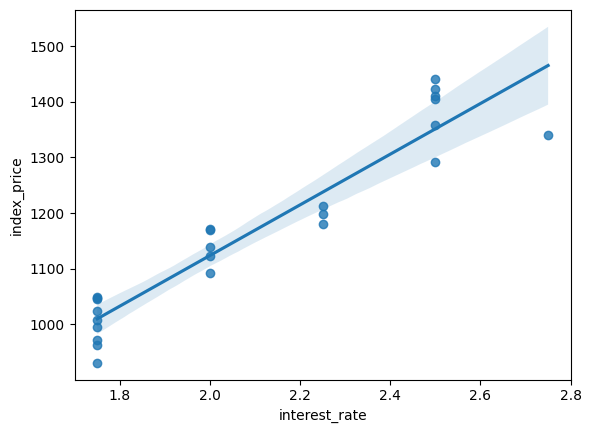

In [29]:
sns.regplot(data=df, x="interest_rate", y="index_price")

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

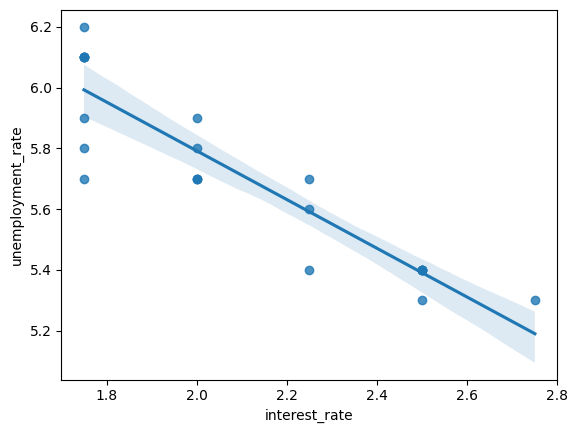

In [30]:
sns.regplot(data=df, x="interest_rate", y="unemployment_rate")

In [31]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [37]:
regression.fit(X_train,y_train)

LinearRegression()

In [39]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train,y_train, scoring='neg_mean_squared_error',cv = 5)

In [41]:
np.mean(validation_score)

-2625.7507009084493

In [42]:
##predictions
y_pred = regression.predict(X_test)

In [43]:
y_pred

array([1229.87356072, 1027.31256884, 1453.9716277 , 1020.13354381,
       1114.23501471])

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(mse)
print(mae)

59.08466245404243
3490.9973373081316
44.832812212294584


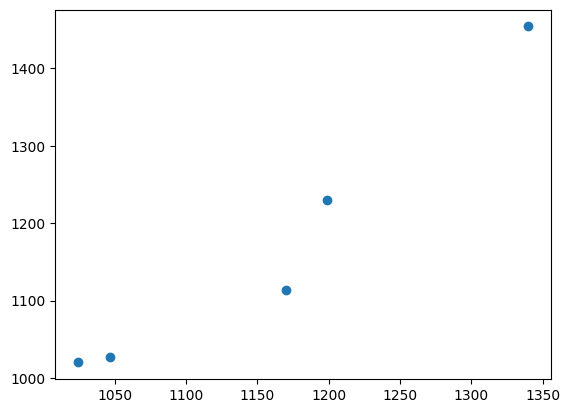

In [45]:
#Assumptions for Multiple linear regression
plt.scatter(y_test,y_pred)

In [47]:
#Residuals or errors
residuals = y_test-y_pred
print(residuals)

8     -30.873561
16     19.687431
0    -113.971628
18      3.866456
11     55.764985
Name: index_price, dtype: float64


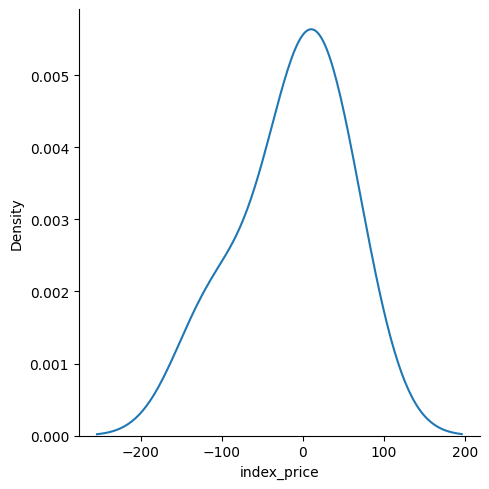

In [51]:
sns.displot(residuals,kind = 'kde')

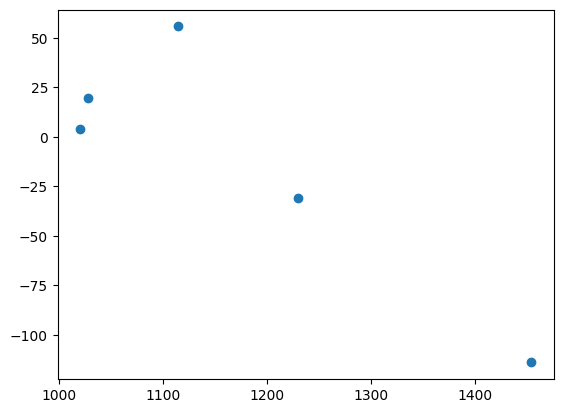

In [52]:
plt.scatter(y_pred, residuals)

In [54]:
regression.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'